# Uber Data Analysis Project 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"D:\Pdhai\Datasets\Arun\Pandas Project\Uber\UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.shape

(1156, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Pre-Processing

In [7]:
df['PURPOSE'].fillna("NOT",inplace=True)
df

C:\Users\pandi\AppData\Local\Temp\ipykernel_11556\3579289263.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PURPOSE'].fillna("NOT",inplace=True)


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [8]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors = 'coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors = 'coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [9]:
from datetime import datetime

df['date'] = pd.DatetimeIndex(df['START_DATE']).date
df['time'] = pd.DatetimeIndex(df['START_DATE']).hour
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [10]:
df['day_night'] = pd.cut(x=df['time'], bins=[0,10,15,19,24], labels = ['Morning','Afternoon','Evening','Night'])

df

In [12]:
df.dropna(inplace=True)

In [13]:
df['month'] = pd.to_datetime(df['date']).dt.month
df['week_date'] = pd.to_datetime(df['date']).dt.weekday

df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day_night,month,week_date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,1,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,1,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,1,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,1,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2016-12-12 13:22:00,2016-12-12 13:32:00,Business,Cary,Cary,3.1,Errand/Supplies,2016-12-12,13.0,Afternoon,12,0
1044,2016-12-12 13:36:00,2016-12-12 13:51:00,Business,Cary,Apex,4.4,Meal/Entertain,2016-12-12,13.0,Afternoon,12,0
1045,2016-12-12 14:26:00,2016-12-12 14:39:00,Business,Apex,Cary,4.7,Customer Visit,2016-12-12,14.0,Afternoon,12,0
1046,2016-12-12 17:51:00,2016-12-12 18:01:00,Business,Cary,Morrisville,3.0,Meal/Entertain,2016-12-12,17.0,Evening,12,0


# Ques1 :- In which category do the people book the most Uber rides?

In [15]:
categorywise_rides = df.groupby('CATEGORY').size()
categorywise_rides

CATEGORY
Business    400
Personal     13
dtype: int64

<Axes: xlabel='count', ylabel='CATEGORY'>

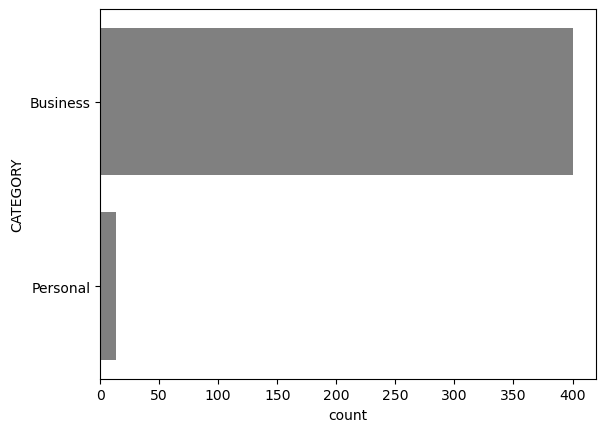

In [61]:
sns.countplot(df['CATEGORY'] , color ='Gray')

# Ques2 :- For Which purpose do the people book the most Uber rides?

In [18]:
purposewise_rides = df.groupby('PURPOSE').size()
purposewise_rides.sort_values(ascending = False)

PURPOSE
NOT                159
Meeting             78
Meal/Entertain      62
Customer Visit      46
Errand/Supplies     45
Temporary Site      14
Between Offices      9
dtype: int64

<Axes: xlabel='count', ylabel='PURPOSE'>

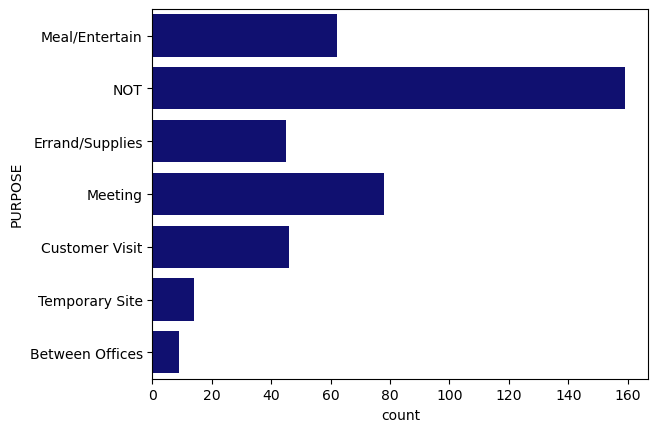

In [65]:
sns.countplot(df['PURPOSE'] , color='Navy')

# Ques3:- At what time do people book cabs the most from Uber ?

In [21]:
timewise_rides = df.groupby("day_night").size()
timewise_rides.sort_values(ascending=False)

C:\Users\pandi\AppData\Local\Temp\ipykernel_11556\1566674822.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  timewise_rides = df.groupby("day_night").size()


day_night
Afternoon    142
Evening      137
Night         71
Morning       63
dtype: int64

<Axes: xlabel='count', ylabel='day_night'>

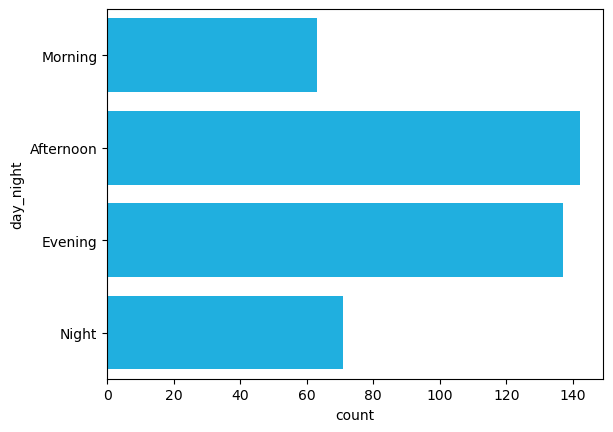

In [67]:
sns.countplot(df['day_night'] , color = 'DeepSkyBlue')

# Ques4 :- In Which months do people book cabs the most from uber?

In [24]:
max_month = df.groupby('month').size()
max_month.sort_values(ascending=False)

month
11    63
8     43
3     42
6     42
2     40
12    39
7     34
5     26
4     24
10    24
1     23
9     13
dtype: int64

<Axes: xlabel='month'>

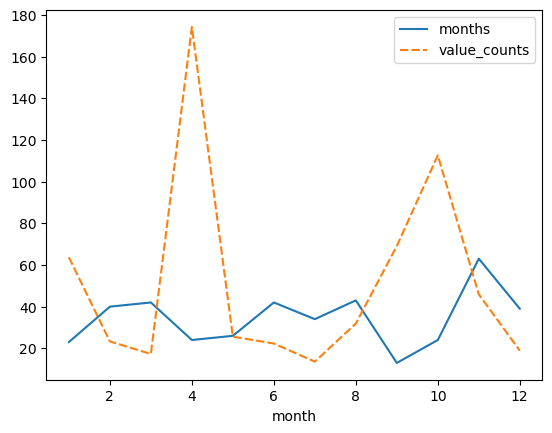

In [25]:
mon = df.month.value_counts(sort = False)

new_df = pd.DataFrame({
    "months" : mon.values,
    "value_counts" : df.groupby('month',sort=False)['MILES'].max()
})
sns.lineplot(data=new_df)

# Ques 5:- On which days of the week do people book Uber rides the most?

In [27]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day_night,month,week_date
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,1,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,1,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,1,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,1,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,1,2


In [28]:
week_day= df.week_date.value_counts()
week_day.sort_values(ascending = False)

week_date
4    86
3    61
0    61
1    58
5    52
2    48
6    47
Name: count, dtype: int64

<Axes: xlabel='week_date', ylabel='count'>

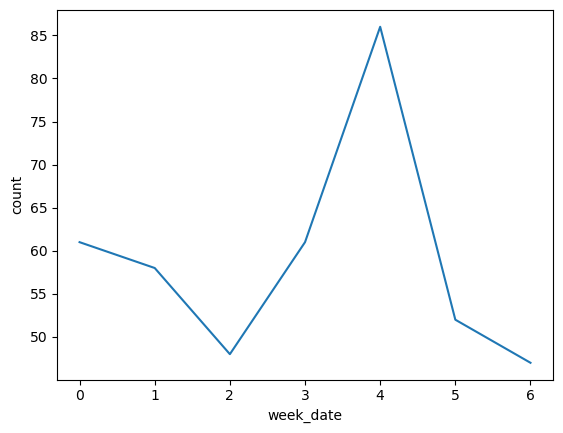

In [29]:
sns.lineplot(data=week_day)

<Axes: xlabel='week_date', ylabel='count'>

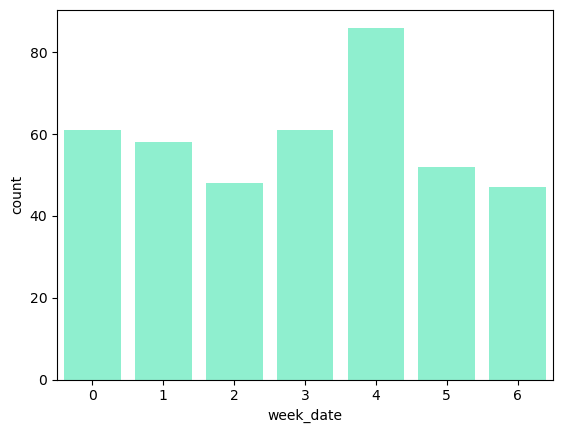

In [69]:
sns.barplot(x=week_day.index, y=week_day , color ='Aquamarine')

# Ques6:- How many miles do people usually book a cab for through Uber ?

<Axes: ylabel='MILES'>

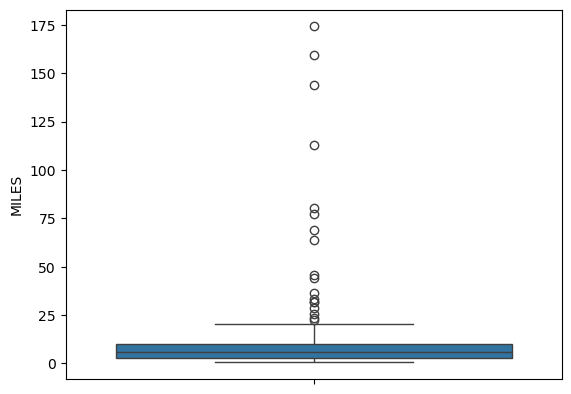

In [32]:
sns.boxplot(df['MILES'])

<Axes: ylabel='MILES'>

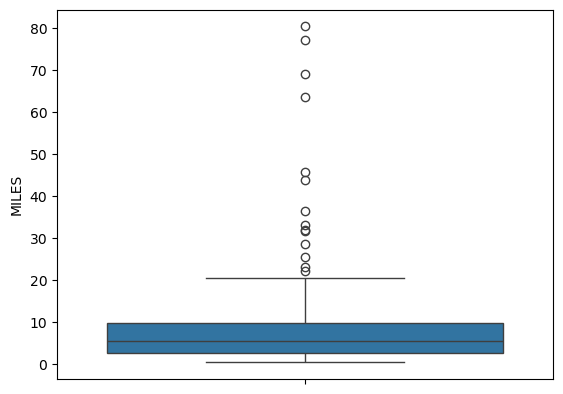

In [33]:
sns.boxplot(df[df["MILES"]<100]["MILES"])

C:\Users\pandi\AppData\Local\Temp\ipykernel_11556\2790555830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df["MILES"]<100]["MILES"])


<Axes: xlabel='MILES', ylabel='Density'>

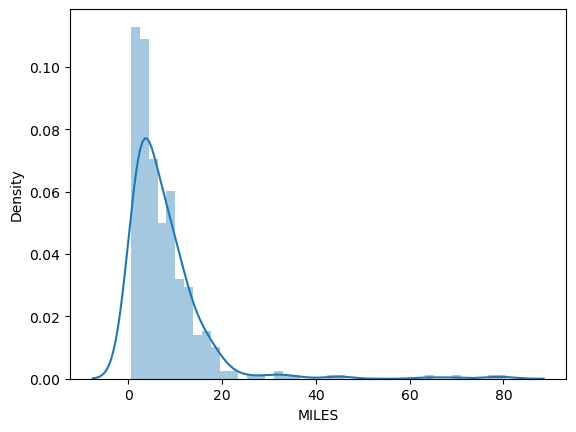

In [34]:
sns.distplot(df[df["MILES"]<100]["MILES"])